In [340]:
!pip install jax jaxlib
!pip install sympy


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\bhanu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\bhanu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Q1

A total of (n*k*m) multiplications and (n*(k-1)*m) additions. Let A be (nxk),B be (kxm) and C = AxB be (nxm) matrices respectively. The we can represent the element at ith row and jth colomn in c as c_ij = sigma(l = 1 to k)a_il*b_lj; so for every element c_ij, k multiplications and (k-1) additions are performed. As C has (n*m) elements a total of (n*k*m) multiplications and (n*(k-1)*m) additions are performed.

Q2

In [341]:
import timeit
import numpy as np

n, k, m = 3, 2, 5
A = [[1,2],
     [2,3],
     [3,4]]
B = [[1,2,3,4,5],
     [2,3,4,5,6]]

start = timeit.default_timer()
C = [[0] * m for _ in range(n)]
for i in range(n):
    for j in range(m):
        for l in range(k):
            C[i][j] += A[i][l] * B[l][j]
end = timeit.default_timer()
print("Time taken by multiplication of matrices using list of lists:")
print(end - start)

#multiplication using numpy
start = timeit.default_timer()
D = np.dot(A, B)
end = timeit.default_timer()
print("Time taken by multiplication of matrices using numpy:")
print(end - start)

Time taken by multiplication of matrices using list of lists:
0.0002663999985088594
Time taken by multiplication of matrices using numpy:
0.00017870000010589138


The multiplication was done faster using numpy than using list of lists. This is because the function np.dot(A,B) has an underlying code which is written in a low level language where the elements of the array are stored in continuous memory location while python code is a high level language.

Q4

derivative of the function with respect to 
x is: f = $2*x*y + y^3*cosx$ and with respect to 
y is: f = $ x^2 + 3*y^2*sinx$

In [342]:
import math
def grad_x(x,y):
    return (2*x*y) + pow(y,3)*math.cos(x)

def grad_y(x,y):
    return pow(x,2) + 3*pow(y,2)*math.sin(x)


print("Gradient of the functions for various values of x and y")
print("x = 1, y = 1")
print(grad_x(1,1), grad_y(1,1))
print("x = 10, y = 5")
print(grad_x(10,5), grad_y(10,5))
print("x = 7, y = 13")
print(grad_x(7,13), grad_y(7,13))

Gradient of the functions for various values of x and y
x = 1, y = 1
2.5403023058681398 3.5244129544236893
x = 10, y = 5
-4.883941134556551 59.19841668329727
x = 7, y = 13
1838.3232527922403 382.09220555042606


Q5

In [343]:
from jax import grad
import jax.numpy as jnp

def func(x, y):
    return (jnp.power(x, 2) * y + jnp.power(y, 3) * jnp.sin(x))

print("Gradient of the functions for various values of x and y")

x, y = jnp.array(1.0), jnp.array(1.0)  
print("x = 1, y = 1")
print(grad_x, grad_y)
x, y = jnp.array(10.0), jnp.array(5.0)  
grad_x = grad(func, argnums = 0)(x,y)
grad_y = grad(func, argnums = 1)(x,y)
print("x = 10, y = 5")
print(grad_x, grad_y)
x, y = jnp.array(7.0), jnp.array(13.0) 
grad_x = grad(func, argnums = 0)(x,y)
grad_y = grad(func, argnums = 1)(x,y) 
print("x = 7, y = 13")
print(grad_x, grad_y)

Gradient of the functions for various values of x and y
x = 1, y = 1
<function grad_x at 0x00000296CFA491B0> <function grad_y at 0x00000296CF135A20>
x = 10, y = 5
-4.8839417 59.198414
x = 7, y = 13
1838.3232 382.0922


Q6

In [344]:
import sympy as sy

x, y = sy.symbols('x y')

def func(x, y):
    return (x**2 * y + y**3 * sy.sin(x))

diff_x = sy.diff(func(x, y), x)
print(diff_x)

diff_y = sy.diff(func(x, y), y)
print(diff_y)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


Q7

In [345]:
record = {
  "2022": {
      "branch 1": {
          "Roll number" : 1,
          "Name" : "N",
          "Marks" : {
              "Maths" : 100,
              "English" : 70
          }
      },
      "branch 2" : {}
  },
  "2023": {
      "branch 1",
      "branch 2"
  },
  "2024": {
      "branch 1",
      "branch 2"
  },
  "2025": {
      "branch 1",
      "branch 2"
  }
}

Q8

In [346]:
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch_num):
        self.branches[branch_num] = Branch()

class Branch:
    def __init__(self):
        self.students = {}

    def add_student(self, rollNumber, name, marks):
        self.students[rollNumber] = Student(rollNumber, name, marks)

class Student:
    def __init__(self, rollNumber, name, marks):
        self.rollNumber = rollNumber
        self.name = name  
        self.marks = marks

year_2022 = Year(2022)
year_2022.add_branch("branch 1")
year_2022.add_branch("branch 2")
year_2022.branches["branch 1"].add_student(1, "N", {"Maths": 100, "English": 70})

year_2023 = Year(2023)
year_2023.add_branch("branch 1")
year_2023.add_branch("branch 2")  # Corrected: Used year_2023 instead of year_2022

year_2024 = Year(2024)
year_2024.add_branch("branch 1")
year_2024.add_branch("branch 2")  # Corrected: Used year_2024 instead of year_2022

year_2025 = Year(2025)
year_2025.add_branch("branch 1")
year_2025.add_branch("branch 2")  # Corrected: Used year_2025 instead of year_2022

print(year_2022.branches["branch 1"].students[1].name)


N


Q9

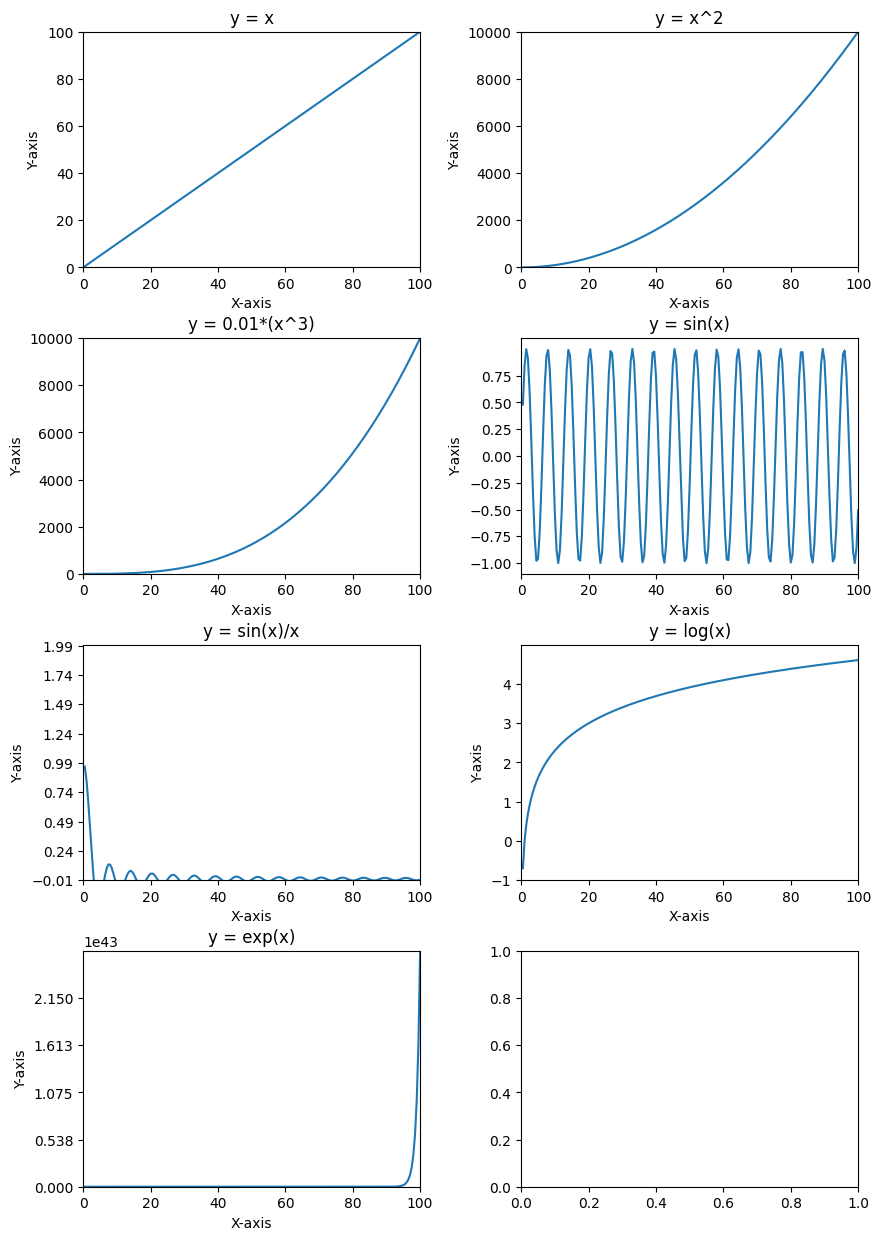

In [347]:
import matplotlib.pyplot as plt

x = np.linspace(0.5, 100, num = 200)
y = x

fig, ax = plt.subplots(nrows = 4, ncols = 2, figsize = (10, 15))

ax[0,0].plot(x, y)
ax[0,0].set(xlim=(0, 100), xticks=np.arange(0, 101, 20),
       ylim=(0, 100), yticks=np.arange(0, 101, 20))
ax[0,0].set_xlabel('X-axis')
ax[0,0].set_ylabel('Y-axis')
ax[0,0].set_title('y = x')

y_2 = x**2
ax[0,1].plot(x, y_2)

ax[0,1].set(xlim=(0, 100), xticks=np.arange(0, 101, 20),
       ylim=(0, 10000), yticks=np.arange(0, 10001, 2000))
ax[0,1].set_xlabel('X-axis')
ax[0,1].set_ylabel('Y-axis')
ax[0,1].set_title('y = x^2')

y_3 = 0.01*(x**3)
ax[1,0].plot(x, y_3)
ax[1,0].set(xlim=(0, 100), xticks=np.arange(0, 101, 20),
       ylim=(0, 10000), yticks=np.arange(0, 10001, 2000))
ax[1,0].set_xlabel('X-axis')
ax[1,0].set_ylabel('Y-axis')
ax[1,0].set_title('y = 0.01*(x^3)')

y_4 = np.sin(x)
ax[1,1].plot(x, y_4)
ax[1,1].set(xlim=(0, 100), xticks=np.arange(0, 101, 20),
       ylim=(-1.1, 1.1), yticks=np.arange(-1, 1, 0.25))
ax[1,1].set_xlabel('X-axis')
ax[1,1].set_ylabel('Y-axis')
ax[1,1].set_title('y = sin(x)')

y_5 = (np.sin(x))/x
ax[2,0].plot(x, y_5)
ax[2,0].set(xlim=(0, 100), xticks=np.arange(0, 101, 20),
       ylim=(-0.01, 2), yticks=np.arange(-0.01, 2.1, 0.25))
ax[2,0].set_xlabel('X-axis')
ax[2,0].set_ylabel('Y-axis')
ax[2,0].set_title('y = sin(x)/x')

y_6 = np.log(x)
ax[2,1].plot(x, y_6)
ax[2,1].set(xlim=(0, 100), xticks=np.arange(0, 101, 20),
       ylim=(-1, 5), yticks=np.arange(-1, 5, 1))
ax[2,1].set_xlabel('X-axis')
ax[2,1].set_ylabel('Y-axis')
ax[2,1].set_title('y = log(x)')

y_7 = np.exp(x)
ax[3,0].plot(x, y_7)
ax[3,0].set(xlim=(0, 100), xticks=np.arange(0, 101, 20),
       ylim=(0, 2.6881171e+43), yticks=np.arange(0, 2.6881171e+43, (2.6881171e+43)/5))
ax[3,0].set_xlabel('X-axis')
ax[3,0].set_ylabel('Y-axis')
ax[3,0].set_title('y = exp(x)')


plt.subplots_adjust(wspace= 0.3, hspace= 0.3)
plt.show()


Q10

In [348]:
import pandas as pd 

matrix = np.random.uniform(1, 2, size=(20,5))
column_names = [ 'a', 'b', 'c', 'd', 'e']
df = pd.DataFrame(data =matrix,  
                  columns = column_names)
# print(df)

std_a = df['a'].std()
std_b = df['b'].std()
std_c = df['c'].std()
std_d = df['d'].std()
std_e = df['e'].std()
print("Standard deviation of the columns")
print(std_a, std_b, std_c, std_d, std_e)
print("The column with the highest standard deviation is", df.std().idxmax())
print("The row with the lowest mean is", df.mean(axis = 1).idxmin())

Standard deviation of the columns
0.3087156205801025 0.32164311311878335 0.2898005135109092 0.31217447517259833 0.23907018673538033
The column with the highest standard deviation is b
The row with the lowest mean is 0


Q11

In [349]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f']< 8, "LT8", "GT8")
print("Number of rows in the dataframe where the value in the column g is LT8 is", len(df[df['g'] == 'LT8']) )
print("Standard deviation of the column f for the rows where the value in the column “g” is:")
print("LT8 is", df[df['g']=='LT8']['f'].std())
print("GT8 is", df[df['g']=='LT8']['f'].std())

Number of rows in the dataframe where the value in the column g is LT8 is 16
Standard deviation of the column f for the rows where the value in the column “g” is:
LT8 is 0.4691298658550291
GT8 is 0.4691298658550291


Q12

In [350]:
import numpy as np

arr1 = np.random.randint(1, 10, size=(2 ,3))
arr2 = np.random.randint(1, 10, size=(1, 3))
arr = arr1 + arr2
print("array 1:")
print(arr1)
print("array 2:")
print(arr2)
print("after broadcasting array 1 and array 2:")
print(arr)

array 1:
[[6 2 3]
 [4 7 4]]
array 2:
[[3 8 4]]
after broadcasting array 1 and array 2:
[[ 9 10  7]
 [ 7 15  8]]


Q13

In [351]:
arr = np.random.randint(1,10,size = 6)

def argmin(arr):
    min = 0
    for i in range(len(arr)):
        if(arr[min] > arr[i]):
            min = i
    return min

print(arr)
print(argmin(arr))
print("argmin found using numpy.argmin")
print(np.argmin(arr))

[3 5 8 9 2 6]
4
argmin found using numpy.argmin
4
